## MNIST 데이터셋 다운로드

In [17]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

## 데이터의 형태 확인하기

In [18]:
# 훈련 데이터
print(x_train.shape, y_train.shape)
print(y_train)

print('\n')

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


## 데이터 그려보기

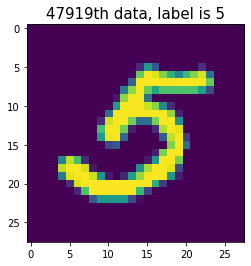

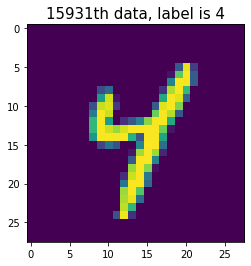

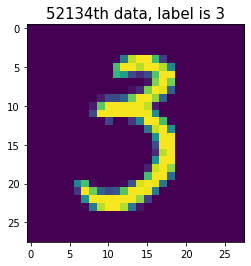

In [19]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 3
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size = sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%dth data, label is %d' % (idx,label), fontsize = 15)

## 검증 데이터 만들기

In [20]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

print(f'훈련 데이터:{x_train.shape}, 레이블:{y_train.shape}')
print(f'검증 데이터:{x_val.shape}, 레이블:{y_val.shape}')

훈련 데이터:(42000, 28, 28), 레이블:(42000,)
검증 데이터:(18000, 28, 28), 레이블:(18000,)


## 모델 입력을 위한 데이터 전처리

In [21]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경합니다.

(42000, 784)


## 모델 입력을 위한 레이블 전처리

In [22]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 모델 구성하기

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## 소프트맥스와 시그모이드 값의 비교

In [25]:
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr - m # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


## 학습과정 설정하기

In [26]:
model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

## 모델 학습하기

In [27]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

Epoch 1/30


2022-11-01 13:43:18.963247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.4928 - acc: 0.8647

2022-11-01 13:43:22.781248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 5s 11ms/step - loss: 0.4928 - acc: 0.8647 - val_loss: 0.2467 - val_acc: 0.9298
Epoch 2/30
329/329 [==============================] - 4s 11ms/step - loss: 0.2122 - acc: 0.9384 - val_loss: 0.1949 - val_acc: 0.9434
Epoch 3/30
329/329 [==============================] - 4s 11ms/step - loss: 0.1620 - acc: 0.9533 - val_loss: 0.1598 - val_acc: 0.9531
Epoch 4/30
329/329 [==============================] - 4s 11ms/step - loss: 0.1306 - acc: 0.9618 - val_loss: 0.1454 - val_acc: 0.9568
Epoch 5/30
329/329 [==============================] - 4s 11ms/step - loss: 0.1082 - acc: 0.9678 - val_loss: 0.1363 - val_acc: 0.9595
Epoch 6/30
329/329 [==============================] - 4s 11ms/step - loss: 0.0909 - acc: 0.9734 - val_loss: 0.1247 - val_acc: 0.9625
Epoch 7/30
329/329 [==============================] - 4s 11ms/step - loss: 0.0798 - acc: 0.9760 - val_loss: 0.1227 - val_acc: 0.9642
Epoch 8/30
329/329 [==============================] - 4s 11ms/step - loss: 0.069

In [28]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## 학습 결과 그려보기

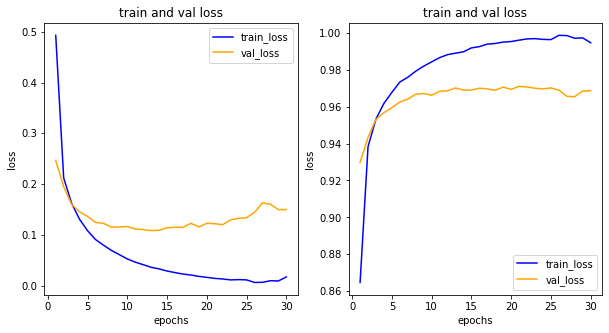

In [29]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 평가하기

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1354 - acc: 0.9709


[0.13541169464588165, 0.9709000587463379]

## 학습된 모델을 통해 값 예측하기

In [31]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

2022-11-01 13:45:24.563857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(10000, 10)
각 클래스에 속할 확률 : 
[3.9522799e-12 1.8426970e-13 1.7940469e-09 6.7826824e-09 2.3869133e-14
 3.8985823e-10 6.8452227e-20 9.9999952e-01 5.8892436e-08 3.9987617e-07]


## 예측값 그려서 확인해보기

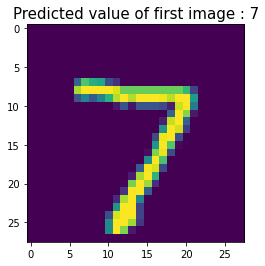

In [32]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of first image : ' + str(arg_results[0]), fontsize = 15)
plt.show()

## 모델 평가 방법 1 - 혼동 행렬

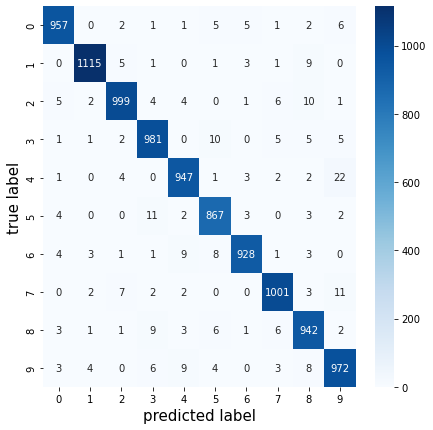

In [34]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

## 모델 평가 방법 2 - 분류 보고서

In [35]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## 모델 저장

In [36]:
import h5py as h5

model.save("mnist_detection.h5")

## 전체 코드

In [ ]:
import tensorflow as tf
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (x_val, y_val))

# model.evaluate(x_test, y_test)
results = model.predict(x_test)